In [1]:
# Análisis y manejo de datos
import pandas as pd 
import numpy as np 

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("Librerías correctamente importadas")

Librerías correctamente importadas


In [5]:
df = pd.read_csv('data.csv')
print('Preview del dataset:')
display(df.head(5))
print('Valores nulos')
print(df.isnull().sum())
print('Apariciones de cada estado')
print(df['ENTIDAD'].value_counts())

Preview del dataset:


,PERIODO,CVE_ENT,ENTIDAD,MINIMA,MEDIA,MAXIMA,PRECIPITACION
0,1985-01-01,0,Nacional,7.8,15.9,23.9,36.0
1,1985-01-01,1,Aguascalientes,3.1,12.2,21.3,4.9
2,1985-01-01,2,Baja California,5.6,12.9,20.2,12.2
3,1985-01-01,3,Baja California Sur,9.2,17.1,25.0,30.3
4,1985-01-01,4,Campeche,15.7,22.7,29.7,20.9


Valores nulos
PERIODO          0
CVE_ENT          0
ENTIDAD          0
MINIMA           0
MEDIA            0
MAXIMA           0
PRECIPITACION    0
dtype: int64
Apariciones de cada estado
ENTIDAD
Nacional               486
Aguascalientes         486
Baja California        486
Baja California Sur    486
Campeche               486
Coahuila               486
Colima                 486
Chiapas                486
Chihuahua              486
Ciudad de México       486
Durango                486
Guanajuato             486
Guerrero               486
Hidalgo                486
Jalisco                486
Estado de México       486
Michoacán              486
Morelos                486
Nayarit                486
Nuevo León             486
Oaxaca                 486
Puebla                 486
Querétaro              486
Quintana Roo           486
San Luis Potosí        486
Sinaloa                486
Sonora                 486
Tabasco                486
Tamaulipas             486
Tlaxcala              

In [9]:
print('Shape:')
print(df.shape)
print('Size:')
print(df.size)
print('Columnas:')
print(df.columns)
print('Tipos de datos por columna:')
print(df.dtypes)

Shape:
(16038, 7)
Size:
112266
Columnas:
Index(['PERIODO', 'CVE_ENT', 'ENTIDAD', 'MINIMA', 'MEDIA', 'MAXIMA',
       'PRECIPITACION'],
      dtype='object')
Tipos de datos por columna:
PERIODO           object
CVE_ENT            int64
ENTIDAD           object
MINIMA           float64
MEDIA            float64
MAXIMA           float64
PRECIPITACION    float64
dtype: object


In [11]:
data = df.drop(['CVE_ENT','MINIMA','MAXIMA','MEDIA'], axis=1)
display(data.head())

,PERIODO,ENTIDAD,PRECIPITACION
0,1985-01-01,Nacional,36.0
1,1985-01-01,Aguascalientes,4.9
2,1985-01-01,Baja California,12.2
3,1985-01-01,Baja California Sur,30.3
4,1985-01-01,Campeche,20.9


AÑO CON MÁS LLUVIA A NIVEL NACIONAL

In [15]:
#Primero pasar la columna Periodo a tipo datetime
data['PERIODO'] = pd.to_datetime(data['PERIODO'], errors='coerce')
display(data.head())
print(data.dtypes)

,PERIODO,ENTIDAD,PRECIPITACION
0,1985-01-01,Nacional,36.0
1,1985-01-01,Aguascalientes,4.9
2,1985-01-01,Baja California,12.2
3,1985-01-01,Baja California Sur,30.3
4,1985-01-01,Campeche,20.9


PERIODO          datetime64[ns]
ENTIDAD                  object
PRECIPITACION           float64
dtype: object


In [16]:
#Crear columna YEAR
data['YEAR'] = data['PERIODO'].dt.year
display(data.head())

,PERIODO,ENTIDAD,PRECIPITACION,YEAR
0,1985-01-01,Nacional,36.0,1985
1,1985-01-01,Aguascalientes,4.9,1985
2,1985-01-01,Baja California,12.2,1985
3,1985-01-01,Baja California Sur,30.3,1985
4,1985-01-01,Campeche,20.9,1985


In [23]:
df_nacional = data[data['ENTIDAD'] == 'Nacional'].copy()
df_nacional = df_nacional.drop(['ENTIDAD'], axis=1)
display(df_nacional.head())
df_nacional = df_nacional[df_nacional['YEAR'] != 2025]
lluvias_anuales = df_nacional.groupby('YEAR')['PRECIPITACION'].sum().reset_index()
display(lluvias_anuales.head())

,PERIODO,PRECIPITACION,YEAR
0,1985-01-01,36.0,1985
33,1985-02-01,16.5,1985
66,1985-03-01,15.0,1985
99,1985-04-01,37.2,1985
132,1985-05-01,51.5,1985


,YEAR,PRECIPITACION
0,1985,770.6
1,1986,748.0
2,1987,689.2
3,1988,765.6
4,1989,691.8


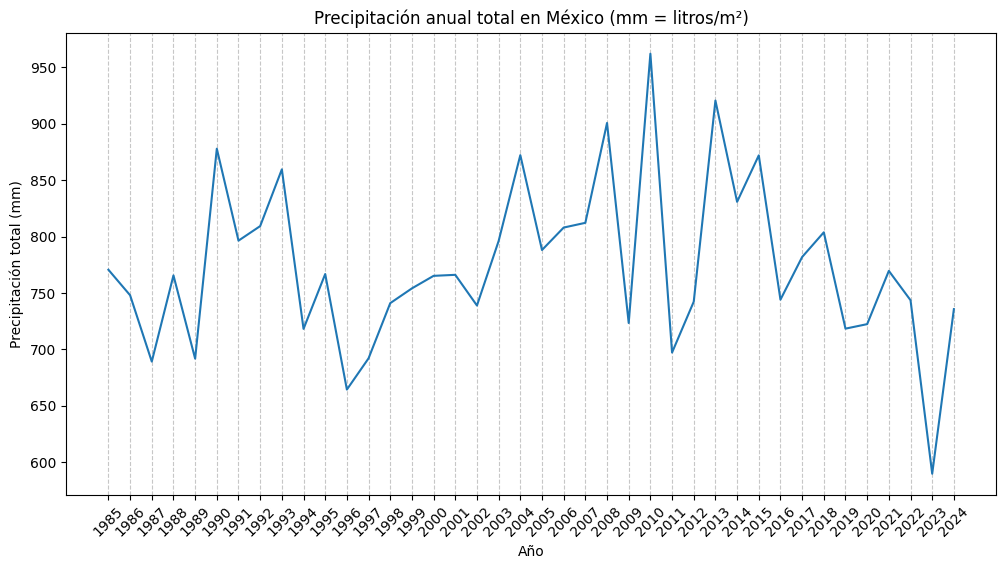

In [27]:
plt.figure(figsize=(12,6)) #Tamaño en pulgadas
plt.plot(lluvias_anuales['YEAR'], lluvias_anuales['PRECIPITACION'])
plt.xlabel('Año')
plt.ylabel('Precipitación total (mm)')
plt.title('Precipitación anual total en México (mm = litros/m²)')
plt.xticks(ticks=lluvias_anuales['YEAR'], rotation=45) #rotar etiquetas
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()